In [3]:
# dogs vs cats dataset
# link below:
# https://www.kaggle.com/c/dogs-vs-cats/data

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense,Flatten,BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam

#for training
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [34]:
os.getcwd()

'C:\\Users\\hp\\practice\\dogs-vs-cats'

In [46]:
#organizing data
os.chdir('C:/Users/hp/practice/dogs-vs-cats')
if os.path.isdir('train/dog') is False:
    os.makedirs('train/dog') 
    os.makedirs('train/cat')
    os.makedirs('valid/dog')
    os.makedirs('valid/cat') 
    os.makedirs('test/dog')
    os.makedirs('test/cat') 
    
for c in random.sample(glob.glob('C:/Users/hp/practice/dogs-vs-cats/train/cat*'), 500):
    shutil.move(c, 'train/cat' ) 
for c in random.sample(glob.glob('C:/Users/hp/practice/dogs-vs-cats/train/dog*'), 500): 
    shutil.move(c, 'train/dog') 
for c in random.sample(glob.glob('C:/Users/hp/practice/dogs-vs-cats/train/cat*'), 100): 
    shutil.move(c, 'valid/cat') 
for c in random.sample(glob.glob('C:/Users/hp/practice/dogs-vs-cats/train/dog*'), 100):
    shutil.move(c, 'valid/dog') 
for c in random.sample(glob.glob('C:/Users/hp/practice/dogs-vs-cats/train/cat*'), 50):
    shutil.move(c, 'test/cat') 
for c in random.sample(glob.glob('C:/Users/hp/practice/dogs-vs-cats/train/dog*'), 50): 
    shutil.move(c, 'test/dog') 

In [47]:
os.chdir('../../')

In [48]:
train_path='C:/Users/hp/practice/dogs-vs-cats/train'
valid_path='C:/Users/hp/practice/dogs-vs-cats/valid'
test_path='C:/Users/hp/practice/dogs-vs-cats/test'


In [51]:
train_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
    .flow_from_directory(directory=train_path,target_size=(224,224),classes=['cat','dog'],batch_size=10)

valid_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
    .flow_from_directory(directory=valid_path,target_size=(224,224),classes=['cat','dog'],batch_size=10)

test_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
    .flow_from_directory(directory=test_path,target_size=(224,224),classes=['cat','dog'],batch_size=10, shuffle=False)



Found 2500 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [55]:
assert train_batches.n==2500 
assert valid_batches.n==400
assert test_batches.n==200 
assert train_batches.num_classes== valid_batches.num_classes ==test_batches.num_classes==2


In [56]:
imgs, labels=next(train_batches)

In [57]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

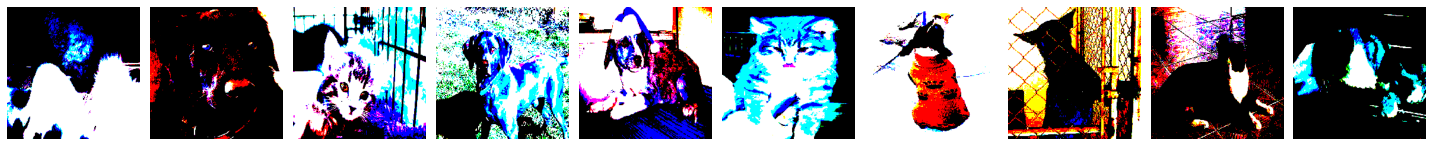

[[1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


In [58]:
plotImages(imgs)
print(labels)

In [70]:
model = Sequential([
    #kernel_size(3,3) == for imgs data
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224,224,3)),
   
    #for cutting imgs in half
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=2, activation='softmax')
])

In [71]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 200704)            0         
                                                                 
 dense_3 (Dense)             (None, 2)                

In [74]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [75]:
model.fit(x=train_batches,
    validation_data=valid_batches,
    epochs=10,
    verbose=2
)

Epoch 1/10
250/250 - 157s - loss: 9.1526 - accuracy: 0.5996 - val_loss: 1.7076 - val_accuracy: 0.6225 - 157s/epoch - 628ms/step
Epoch 2/10
250/250 - 162s - loss: 0.6301 - accuracy: 0.8184 - val_loss: 1.3953 - val_accuracy: 0.6600 - 162s/epoch - 648ms/step
Epoch 3/10
250/250 - 165s - loss: 0.1260 - accuracy: 0.9520 - val_loss: 2.0108 - val_accuracy: 0.6400 - 165s/epoch - 662ms/step
Epoch 4/10
250/250 - 182s - loss: 0.0394 - accuracy: 0.9912 - val_loss: 1.3920 - val_accuracy: 0.6550 - 182s/epoch - 728ms/step
Epoch 5/10
250/250 - 151s - loss: 0.0086 - accuracy: 1.0000 - val_loss: 1.4853 - val_accuracy: 0.6650 - 151s/epoch - 605ms/step
Epoch 6/10
250/250 - 151s - loss: 0.0038 - accuracy: 1.0000 - val_loss: 1.5151 - val_accuracy: 0.6575 - 151s/epoch - 605ms/step
Epoch 7/10
250/250 - 178s - loss: 0.0026 - accuracy: 1.0000 - val_loss: 1.5200 - val_accuracy: 0.6650 - 178s/epoch - 711ms/step
Epoch 8/10
250/250 - 154s - loss: 0.0019 - accuracy: 1.0000 - val_loss: 1.5433 - val_accuracy: 0.6650 - 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

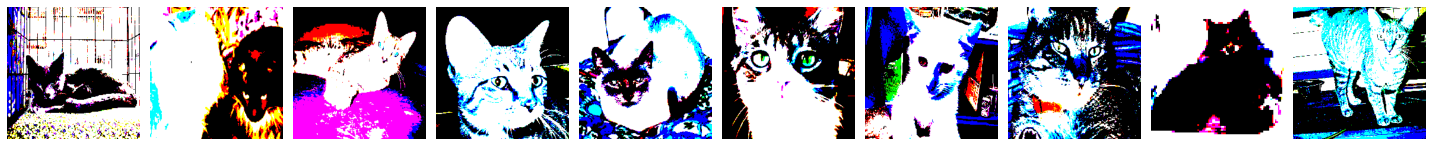

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [76]:
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [77]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [78]:
np.round(predictions)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [79]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [80]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[74 26]
 [46 54]]


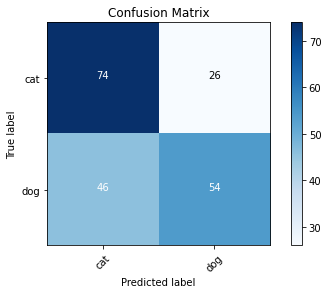

In [81]:
cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')